# Signature Matrix Heat Map

aedavids@ucsc.edu  
6/18/2024  

Copyright (c) 2020-2023, Regents of the University of California All rights reserved. https://polyformproject.org/licenses/noncommercial/1.0.0



In [1]:
import ipynbname

# use display() to print an html version of a data frame
# useful if dataFrame output is not generated by last like of cell
from IPython.display import display

import matplotlib.pyplot as plt 

import os
import pandas as pd
# display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import sys

/data/tmp/ipykernel_1717591/2318993008.py:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# setting the python path allows us to run python scripts from using
# the CLI. 
PYTHONPATH = os.environ['PYTHONPATH']
print("ORIG_PYTHONPATH: {}\n".format(PYTHONPATH))

gitRepoRoot = !git rev-parse --show-toplevel
gitRepoRoot = gitRepoRoot[0]

#
# add deconvolutionAnalysis modules
#
deconvolutionModules = f'{gitRepoRoot}/deconvolutionAnalysis/python'
print("deconvolutionModules: {}\n".format(deconvolutionModules))

PYTHONPATH = PYTHONPATH + f':{deconvolutionModules}'
#print("PYTHONPATH: {}\n".format(PYTHONPATH))

sys.path.append( str(deconvolutionModules) )
#print("\nsys.path:\n{}\n".format(sys.path))

#
# add intraExtraRNA_POC modules
#
# intraExtraRNA_POCModules = f'{gitRepoRoot}/intraExtraRNA_POC/python/src'
# print("intraExtraRNA_POCModules: {}\n".format(intraExtraRNA_POCModules))

# PYTHONPATH = PYTHONPATH + f':{intraExtraRNA_POCModules}'
# #print("PYTHONPATH: {}\n".format(PYTHONPATH))

# sys.path.append( str(intraExtraRNA_POCModules) )
# #print("\nsys.path:\n{}\n".format(sys.path))

ORIG_PYTHONPATH: :/private/home/aedavids/extraCellularRNA/src:/private/home/aedavids/extraCellularRNA/src

deconvolutionModules: /private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/python



In [3]:
from pipeline.dataFactory.utilities import urlify

In [4]:
notebookName = ipynbname.name()
notebookPath = ipynbname.path()
notebookDir = os.path.dirname(notebookPath)

outDir = f'{notebookDir}/{notebookName}.out'
os.makedirs(outDir, exist_ok=True)
print(f'outDir:\n{outDir}')

imgOut = f'{outDir}/img'
os.makedirs(imgOut, exist_ok=True)
print(f'\nimgOut :\n{imgOut}')

outDir:
/private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/jupyterNotebooks/signatureMatrixHeatMap.out

imgOut :
/private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/jupyterNotebooks/signatureMatrixHeatMap.out/img


In [5]:
# runName = "best10CuratedDegree1_ce467ff"
# weird = "best10CuratedDegree1"

runName = "best10CuratedDegree1"
rootDir = "/private/groups/kimlab/aedavids/deconvolution/1vsAll-~gender_category"
# runOutDir = f'{rootDir}/{runName}/training/{weird}.sh.out'
runOutDir = f'{rootDir}/{runName}/training/{runName}.sh.out'
ciberSortInput = "GTEx_TCGA-design-tilda_gender_category-padj-0001-lfc-20-n-10/ciberSortInput"

In [6]:
signatureGenesPath = f'{runOutDir}/{ciberSortInput}/signatureGenes.tsv'
signatureGenesDF = pd.read_csv(signatureGenesPath, sep="\t", index_col="name")
print(f'signatureGenesDF.shape : {signatureGenesDF.shape}')
print(f'max : {signatureGenesDF.max().max()}')
print(f'min : {signatureGenesDF.min().min()}')

display( signatureGenesDF.describe() )

signatureGenesDF.head()

signatureGenesDF.shape : (714, 83)
max : 6081155.281834357
min : 0.0


,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,BLCA,BRCA,Bladder,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,Brain_Cerebellum,Brain_Cortex,Brain_Frontal_Cortex_BA9,Brain_Hippocampus,Brain_Hypothalamus,Brain_Nucleus_accumbens_basal_ganglia,Brain_Putamen_basal_ganglia,Brain_Spinal_cord_cervical_c-1,Brain_Substantia_nigra,Breast_Mammary_Tissue,CESC,CHOL,COAD,Cells_Cultured_fibroblasts,Cells_EBV-transformed_lymphocytes,Cervix_Endocervix,Colon_Sigmoid,Colon_Transverse,DLBC,ESCA,Esophagus_Gastroesophageal_Junction,Esophagus_Mucosa,Esophagus_Muscularis,GBM,HNSC,Heart_Atrial_Appendage,Heart_Left_Ventricle,KICH,KIRC,KIRP,Kidney_Cortex,LGG,LIHC,LUAD,LUSC,Liver,Lung,MESO,Minor_Salivary_Gland,Muscle_Skeletal,Nerve_Tibial,OV,Ovary,PAAD,PCPG,PRAD,Pancreas,Pituitary,Prostate,READ,SARC,SKCM,STAD,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,TGCT,THCA,THYM,Testis,Thyroid,UCEC,UCS,UVM,Uterus,Vagina,Whole_Blood
count,7.140000e+02,714.000000,714.000000,7.140000e+02,714.000000,714.000000,714.000000,7.140000e+02,7.140000e+02,714.000000,7.140000e+02,7.140000e+02,7.140000e+02,714.000000,714.000000,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,714.000000,7.140000e+02,7.140000e+02,7.140000e+02,714.000000,714.000000,714.000000,714.000000,7.140000e+02,714.000000,7.140000e+02,714.000000,714.000000,714.000000,714.000000,714.000000,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,714.000000,7.140000e+02,714.000000,714.000000,7.140000e+02,7.140000e+02,714.000000,7.140000e+02,714.000000,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,714.000000,714.000000,7.140000e+02,7.140000e+02,7.140000e+02,714.000000,714.000000,7.140000e+02,714.000000,7.140000e+02,714.000000,7.140000e+02,714.000000,714.000000,714.000000,7.140000e+02,714.000000,7.140000e+02,714.000000,714.000000,7.140000e+02
mean,1.962407e+04,8222.134405,7753.385992,1.223503e+04,3935.598938,5443.766806,4819.089638,1.346136e+04,1.793554e+04,6959.637211,1.152389e+04,1.379600e+04,1.445063e+04,10386.534262,8425.665755,1.269702e+04,1.164661e+04,1.229964e+04,1.434883e+04,1.354127e+04,1.292077e+04,7.923342e+03,1.034365e+04,8101.892223,1.435036e+04,1.110270e+04,1.321500e+04,6346.904048,10137.082106,5069.792313,7832.993055,1.406482e+04,9064.762851,3.516409e+04,8797.738364,5286.851613,8130.526593,9189.935382,11538.557320,1.323412e+04,1.261162e+04,4.137041e+04,2.371632e+04,2.145545e+04,1.524259e+04,1.960101e+04,9.168689e+03,1.385891e+04,13467.291458,7.342998e+03,5731.107868,10775.589180,1.124293e+04,1.050792e+04,6270.374097,3.132805e+04,5097.128573,1.361809e+04,1.909223e+04,1.646531e+04,1.308442e+04,1.173899e+04,7911.258934,13416.129148,3.895147e+04,1.648911e+04,3.504111e+04,7098.575494,6984.589484,9.459845e+03,6648.917966,1.462437e+04,11335.575457,2.311750e+04,12654.069951,8430.313504,6641.123935,1.276487e+04,11830.505425,1.512211e+04,5370.875020,5014.484458,9.745616e+03
std,1.550816e+05,50342.252673,49430.495978,9.902671e+04,16806.950435,28832.063310,23827.566218,7.448316e+04,8.226410e+04,43571.551530,1.084653e+05,1.248289e+05,1.285498e+05,72047.683447,61148.282216,1.139701e+05,1.007085e+05,1.138715e+05,1.246207e+05,1.193756e+05,1.156341e+05,6.470823e+04,9.416050e+04,50687.717746,6.398319e+04,6.188092e+04,6.458951e+04,29380.646606,49623.373509,21015.502616,50282.912053,1.121487e+05,32286.391088,2.243846e+05,59941.403699,31683.730123,55884.983507,42948.047292,45952.436981,1.070330e+05,1.145056e+05,3.446475e+05,1.562244e+05,1.577192e+05,1.278920e+05,1.270828e+05,5.702886e+04,6.263076e+04,52931.037695,6.444361e+04,29315.172959,41347.859032,1.017109e+05,7.185095e+04,30177.110305,1.699435e+05,21128.449195,6.166923e+04,1.456186e+05,8.259460e+04,9.330900e+04,8.490259e+04,50249.850479,65765.753001,1.48

,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,BLCA,BRCA,Bladder,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,Brain_Cerebellum,Brain_Cortex,Brain_Frontal_Cortex_BA9,Brain_Hippocampus,Brain_Hypothalamus,Brain_Nucleus_accumbens_basal_ganglia,Brain_Putamen_basal_ganglia,Brain_Spinal_cord_cervical_c-1,Brain_Substantia_nigra,Breast_Mammary_Tissue,CESC,CHOL,COAD,Cells_Cultured_fibroblasts,Cells_EBV-transformed_lymphocytes,Cervix_Endocervix,Colon_Sigmoid,Colon_Transverse,DLBC,ESCA,Esophagus_Gastroesophageal_Junction,Esophagus_Mucosa,Esophagus_Muscularis,GBM,HNSC,Heart_Atrial_Appendage,Heart_Left_Ventricle,KICH,KIRC,KIRP,Kidney_Cortex,LGG,LIHC,LUAD,LUSC,Liver,Lung,MESO,Minor_Salivary_Gland,Muscle_Skeletal,Nerve_Tibial,OV,Ovary,PAAD,PCPG,PRAD,Pancreas,Pituitary,Prostate,READ,SARC,SKCM,STAD,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,TGCT,THCA,THYM,Testis,Thyroid,UCEC,UCS,UVM,Uterus,Vagina,Whole_Blood
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABCA1,2962.083752,5481.336783,4347.506857,9901.496612,1556.418605,2550.209536,1668.211410,3418.792084,5280.864528,3979.590678,710.959382,487.800782,1600.620797,266.284597,291.180402,455.541668,394.127099,476.454787,670.815682,1627.454124,1045.087020,492.175361,808.746469,4222.924486,3919.587576,2310.093248,1838.458496,2891.978563,92.148484,2220.351809,4747.603562,3481.223092,2576.559187,12828.600265,2992.906269,1068.931787,2654.280367,7706.902482,5643.688335,701.144214,423.078886,5042.053121,13153.945510,6153.139477,602.420381,12861.999374,3459.505748,5187.091437,6693.768385,2444.647891,3340.421114,4471.707650,1486.635866,1210.574726,5236.181132,7754.072227,2034.774719,3452.973065,1418.201939,2315.886761,439.280273,919.293575,1327.876332,1976.140903,16142.678638,4267.483358,6745.999964,2472.322167,2655.319349,2926.581143,2250.653627,1406.189545,5537.800185,6884.368121,5805.452576,1260.725026,1683.273979,2266.717208,2502.014109,2633.197783,1847.101360,2210.206443,465.928742
ABCC8,9.724495,58.146299,77.226378,340.335307,26.430285,40.849233,37.683168,16.615046,1611.163547,61.961717,655.307472,1748.671635,1140.848025,11200.581439,10240.533122,2956.302293,2178.573436,870.678402,1678.417527,1251.455058,788.887208,858.476370,506.194543,476.307915,29.123661,299.607502,25.340838,2.741510,6.469949,402.473940,158.135965,197.430229,39.167539,246.550825,62.209113,20.212527,55.742523,653.990285,12.535355,181.195402,132.804289,33.022115,26.191298,32.596996,77.818571,4930.959850,24.581745,121.224441,137.655158,6.566997,1109.303808,15.381632,16.281965,143.505462,516.633532,42.123213,84.328133,6388.834390,1665.232123,482.918340,1252.125192,9197.476987,490.394682,13.058738,1962.206562,11.780725,174.154134,30.186915,27.955842,229.353922,29.491585,564.319411,108.484491,974.585360,258.539091,136.615062,836.926451,97.877702,120.115544,24.017969,351.434558,299.179719,1.326452
ABHD5,1163.682877,2512.975948,2471.958193,795.449808,522.755568,780.370150,509.229380,3136.072152,4831.956592,1053.683287,335.922066,386.884412,386.563951,653.340552,466.580033,362.353517,380.226687,328.161104,490.500323,406.307070,339.124982,1473.784867,536.788442,2151.410215,4292.063167,1225.520198,1386.545148,1234.451598,701.803459,598.698262,685.272940,1038.010157,841.184237,5181.799428,1119.551935,1562.365030,1154.714933,2409.925588,2549.854353,488.946680,507.536479,2355.461032,1747.765251,2431.819402,564.612170,3569.816925,928.809607,2709.142288,2691.893093,365.776347,1291.850643,1500.487889,1880.926205,536.505161,759.430229,3425.055383,430.322131,1774.756301,942.824520,2148.143495,467.312288,535.098259,734.973835,1469.688702,8337.443626,1957.974799,3086.527743,2888.293579,2771.650074,727.645341,741.085533,662.818090,1441.222839,3944.289450,1302.777280,1154.026115,932.292043,2167.560465,1273.456493,417.378795,453.1932

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler().set_output(transform="pandas")
# xDF = signatureGenesDF.iloc[0:5, 0:5]
# display(xDF)
# scaleXDF = scaler.fit_transform( xDF)
# display( scaleXDF )

# display( scaleXDF > 0.2 )

In [16]:
def plotHeatMapSeaborn( df : pd.DataFrame, title, maskArg) :
    '''
    ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html
    '''
    # Defining figure size   
    # for the output plot  
    width = 40
    height = 75 #50 #40
    fig, ax = plt.subplots(figsize = (width, height)) 
    # fig.suptitle( title ) # suptitle
    ax.set_title( title, fontsize=12 )
   
    sns.heatmap( df,  mask=maskArg, cmap ='viridis', ax=ax, cbar=True)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')


    
    imgFilePath = f'{imgOut}/{urlify(title)}.png'
    fig.savefig(imgFilePath, dpi=600, bbox_inches='tight', facecolor="white", transparent=True)
    print(f'saved image to {imgFilePath}')


saved image to /private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/jupyterNotebooks/signatureMatrixHeatMap.out/img/best10CuratedDegree1-signature-matrix-min-max-scaled-values-001-are-hidden.png


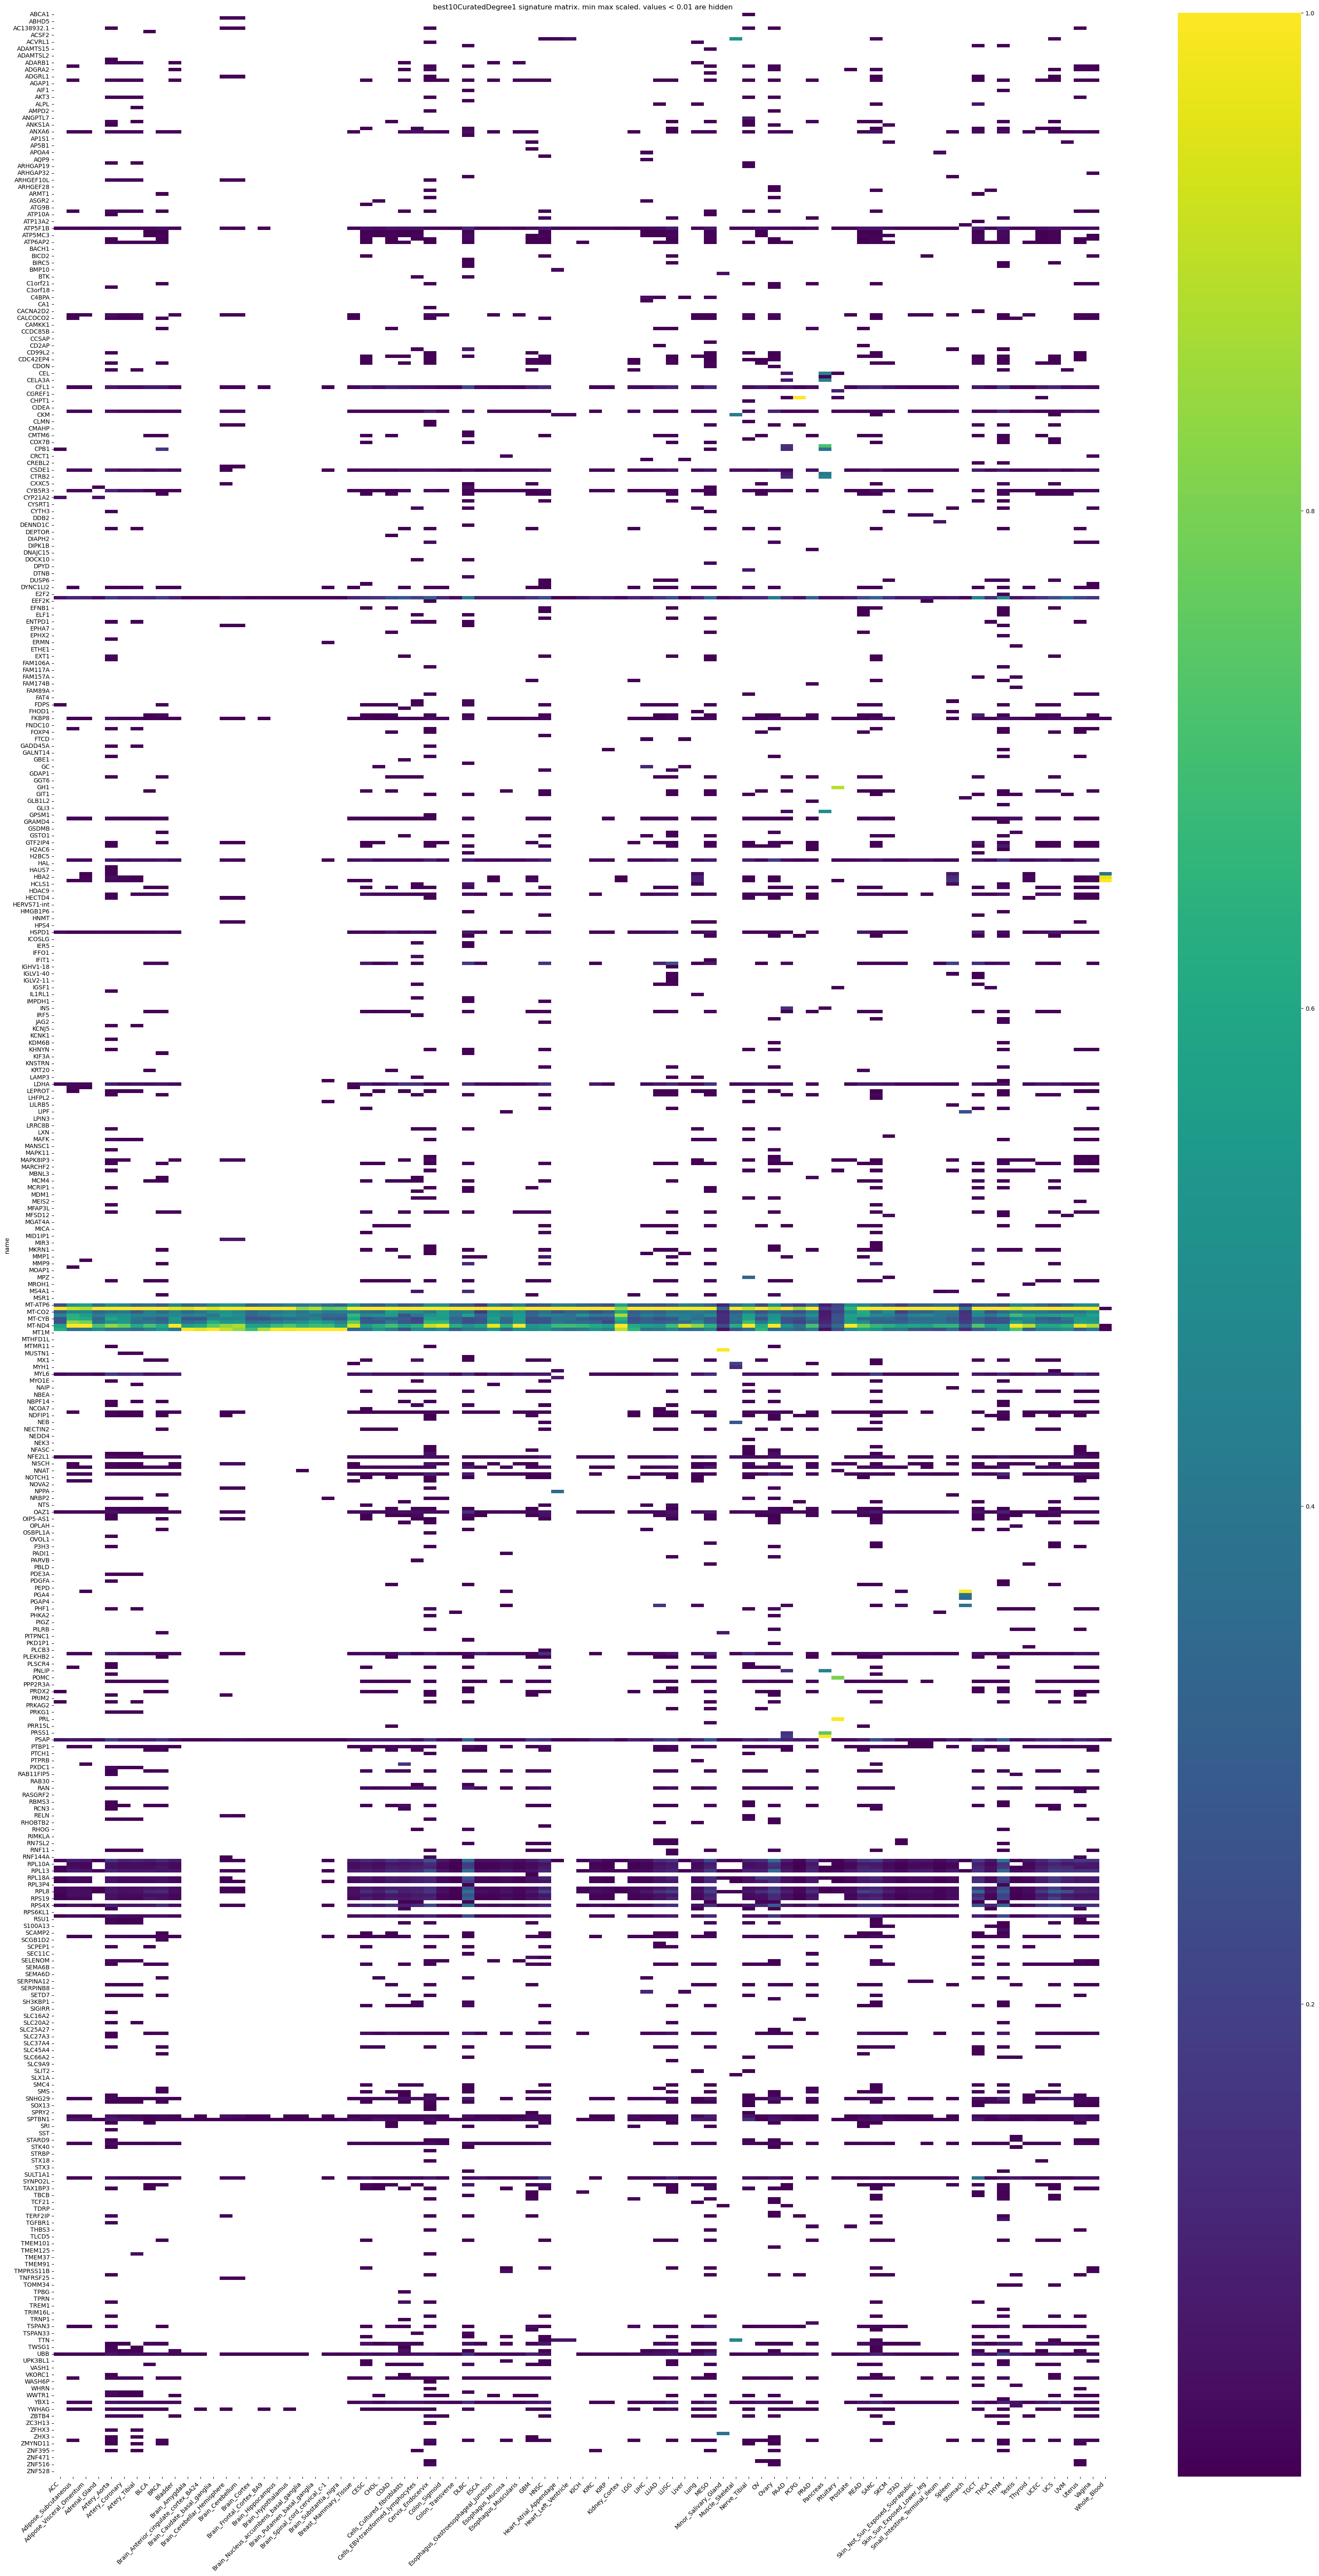

In [17]:
# we want the scaler to output a pandas dataframe
# this data frame will have the correct labels
scaler = MinMaxScaler().set_output(transform="pandas")
# signatureGenesDF = signatureGenesDF.iloc[0:5, 0:3]
scaledSignatureGenesDF = scaler.fit_transform( signatureGenesDF )

# find values bellow our threshold
threshold = 0.01 # do not display zeros
maskDF = scaledSignatureGenesDF < threshold
# display(scaledSignatureGenesDF)
print()
# display(maskDF)

# True in the mask means the value should be hidden.
# when you use a mask your color bar will use all the same colors as if
# you did not use a mask how ever the range of values will be truncated
title = f'{runName} signature matrix. min max scaled. values < {threshold} are hidden'
plotHeatMapSeaborn( scaledSignatureGenesDF, title, maskDF)

In [18]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Sample data
# # data = np.random.rand(10, 10)
# data = np.random.rand(5, 3)
# print(data)
# print()

# # Scale data using MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(data)
# data_scaled = scaler.transform(data)

# print('first col')
# print( data_scaled[:, 0] ) 
# print()

# # Create a mask for values below the threshold
# threshold = 0.5
# mask = data_scaled < threshold
# print("\nmask")
# print(mask)



# # Plot heatmap with the mask
# sns.heatmap(data_scaled, mask=~mask, cmap='viridis', cbar=True)

# plt.show()

In [19]:
# Sample data
# data = np.random.rand(10, 10)
data = np.random.rand(5, 3)
print(data)
print()

# Scale data using MinMaxScaler
scalerX = MinMaxScaler()
scalerX.fit(data)
data_scaled = scalerX.transform(data)

print('first col')
print( data_scaled[:, 0] ) 
print()

# Create a mask for values below the threshold
threshold = 0.5
mask = data_scaled > threshold
print("\nmask")
print(mask)



# Plot heatmap with the mask
sns.heatmap(data_scaled, mask=~mask, cmap='viridis', cbar=True)

plt.show()

NameError: name 'np' is not defined